# Tutorial

this is a basic machine learning tutorial for developpers who are not familiar with the concept and with python

## Variables and functions

Let's discover how variables and functions are handled in python

In [1]:
print("Hello World!")

Hello World!


In [2]:
print("10 * 5 = {}".format(10 * 5))

10 * 5 = 50


In [7]:
def recursive_factorial(n):
    if n <= 1:
        return 1
    return n * recursive_factorial(n - 1)

def imperative_factorial(n):
    if n <= 1:
        return 1

    factorial = 1

    for i in range(2, n + 1):
        factorial *= i

    return factorial

In [8]:
print(recursive_factorial(3))
print(imperative_factorial(3))

6
6


## Classes

Now, let's introduce classes and heritage

In [33]:
import time
import math

class RandomGenerator:

    RAND_MAX = 2147483647

    def __init__(self):
        """this is the constructor"""
        self.__word = math.ceil(time.time())

    def __call__(self):
        if self.__word == 0:
            self.__word = 1

        hi = self.__word // 127773  # euclidian division
        lo = self.__word % 127773  # remainder of the euclidian division

        self.__word = 16807 * lo - 2836 * hi

        if self.__word < 0:
            self.__word += self.RAND_MAX
            
        self.__word = ((self.__word * 1103515245) + 12345) & 0x7fffffff

        return self.__word

In [34]:
rand = RandomGenerator()
print(rand())
print(rand())
print(rand())

1468186754
1439638057
2003482579


In [37]:
class BernoulliRandomGenerator(RandomGenerator):

    def __init__(self, p):
        super().__init__()
        self.__p = p

    def __call__(self):
        rand = super().__call__()
        return 1 if rand <= self.__p * self.RAND_MAX else 0

In [50]:
rand = BernoulliRandomGenerator(p=0.2)
print(rand())
print(rand())
print(rand())
print(rand())

0
0
0
0


## Linear algebra

let's do a little bit of linear algebra

In [57]:
import numpy as np

A = np.eye(3)
b = np.array([0., 1., 0.])

print(np.dot(A, b))
print(np.dot(b.T, A))
print(np.dot(b.T, b))
print(np.linalg.svd(A, full_matrices=1, compute_uv=1))


[0. 1. 0.]
[0. 1. 0.]
1.0
(array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([1., 1., 1.]), array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]))


## Keras

keras is an easy deep learning framework, for many easy neural networks, it will work fine, however, for some more complex networks, you might need to implement a little bit of tensorflow too

In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten, Convolution2D, MaxPooling2D

model = Sequential()

model.add(Convolution2D(32, 3, activation='relu', padding='same', input_shape=(1, 28, 28)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))


In [63]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 28, 32)         8096      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 14, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 14, 32)         128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 14, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 14, 64)         18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 7, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 7, 64)          256       
__________

(60000, 28, 28)


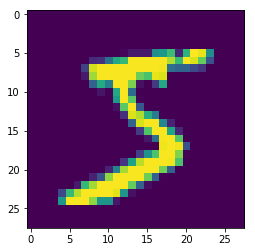

In [65]:
from keras.datasets import mnist
from matplotlib import pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

plt.imshow(X_train[0])
plt.show()

In [66]:
#we reshape the data for keras
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

print(X_train.shape)

(60000, 1, 28, 28)


In [67]:
# we normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [68]:
print(y_train.shape)

print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [69]:
# we need to create binary arrays instead of 0,1,2,3,... in order to have each class in a cell
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train.shape)

(60000, 10)


In [70]:
#we fit the model
model.fit(X_train, Y_train,
          batch_size=32, epochs=10, verbose=1)

/home/arnaud/.virtualenvs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
60000/60000 [==============================] - 325s 5ms/step - loss: 0.3814 - acc: 0.8801
Epoch 2/10
60000/60000 [==============================] - 315s 5ms/step - loss: 0.1705 - acc: 0.9497
Epoch 3/10
60000/60000 [==============================] - 322s 5ms/step - loss: 0.1365 - acc: 0.9602
Epoch 4/10
60000/60000 [==============================] - 318s 5ms/step - loss: 0.1260 - acc: 0.9628
Epoch 5/10
60000/60000 [==============================] - 322s 5ms/step - loss: 0.1109 - acc: 0.9677
Epoch 6/10
60000/60000 [==============================] - 319s 5ms/step - loss: 0.1038 - acc: 0.9690
Epoch 7/10
 4512/60000 [=>............................] - ETA: 6:13 - loss: 0.0896 - acc: 0.9732

KeyboardInterrupt: 

In [72]:
# we score in order to see our efficiency
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04345657138723472, 0.9875]
